<a href="https://colab.research.google.com/github/bacoco/deeplearning.fr/blob/main/eda_and_automl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
if not sys.warnoptions:
    warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
!pip install mljar-supervised

!pip install lazypredict
!pip install ydata_profiling
!pip install atom-ml
!pip install sweetviz

!pip install matplotlib==3.1.3



# EDA - Exploratory Data Analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
df = pd.read_csv("https://raw.githubusercontent.com/pplonski/datasets-for-start/master/adult/data.csv",skipinitialspace=True,)

X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df["income"], test_size=0.25)

## SWEETVIZ

> https://github.com/fbdesignpro/sweetviz







In [ ]:
import sweetviz as sv

my_report = sv.analyze(df)

# we generate html report
# Default arguments will generate to "SWEETVIZ_REPORT.html"
my_report.show_html() 


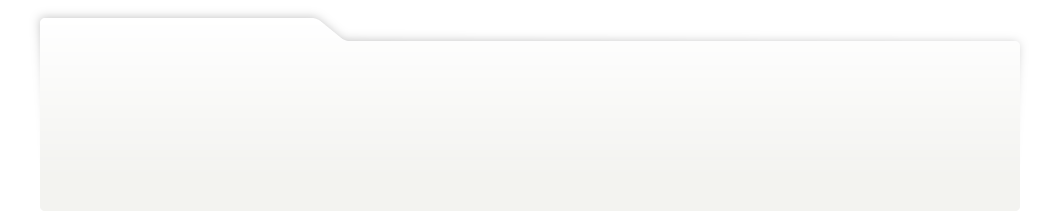
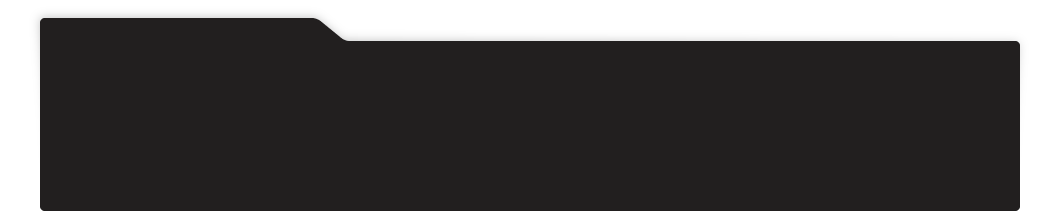
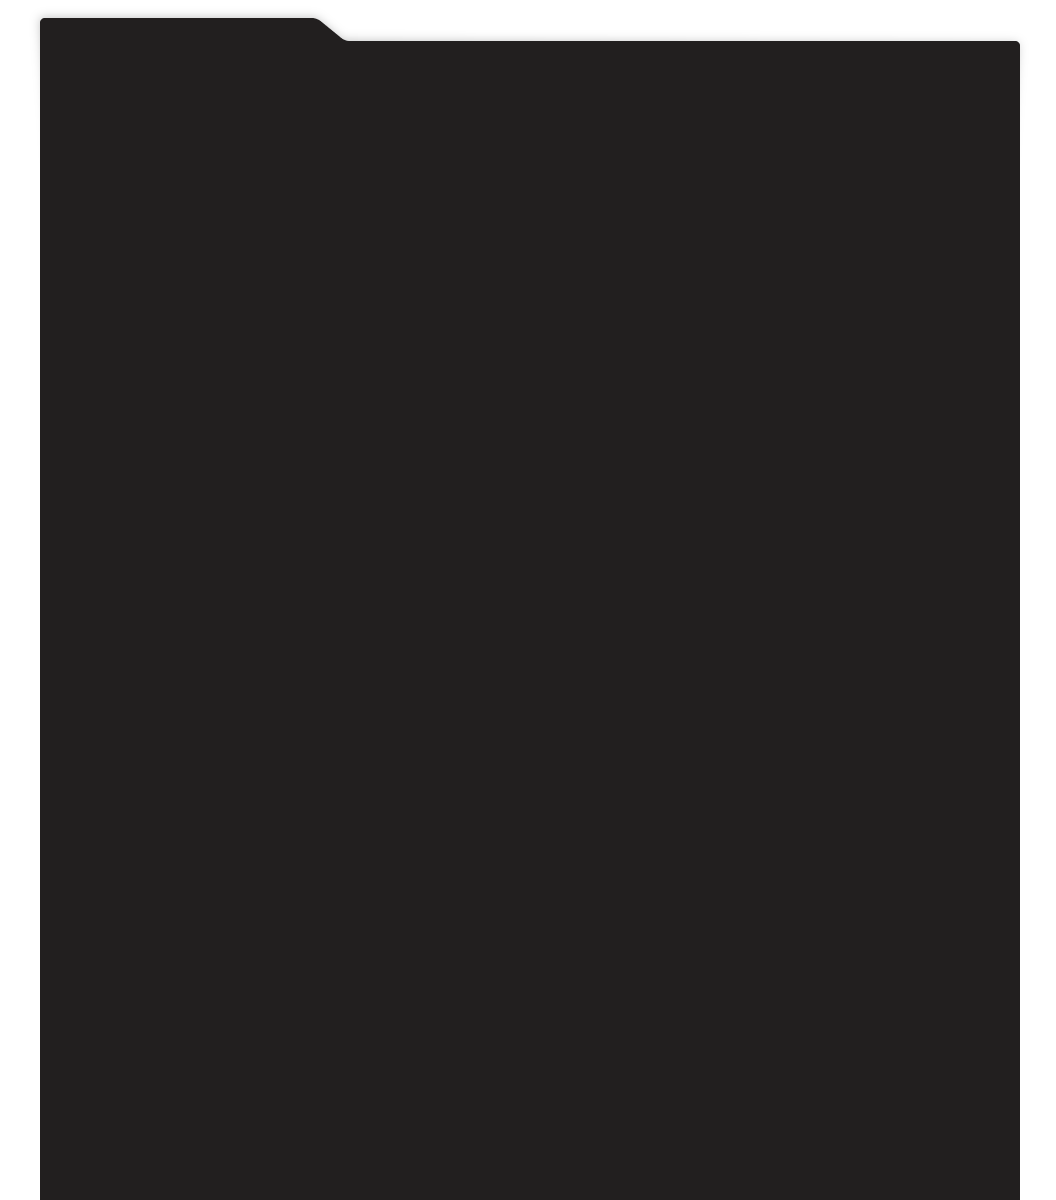
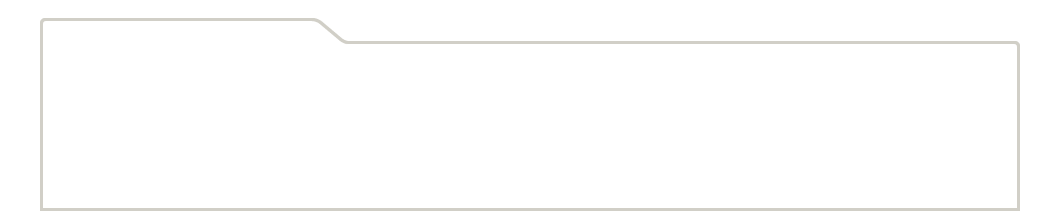
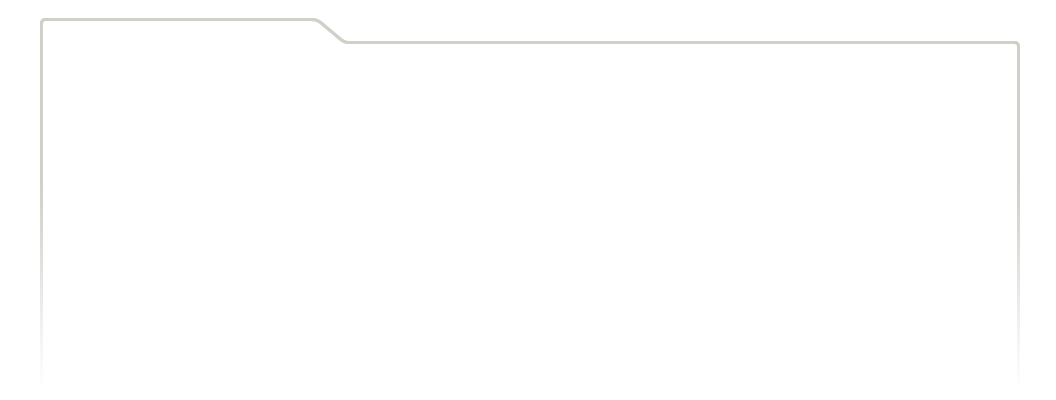
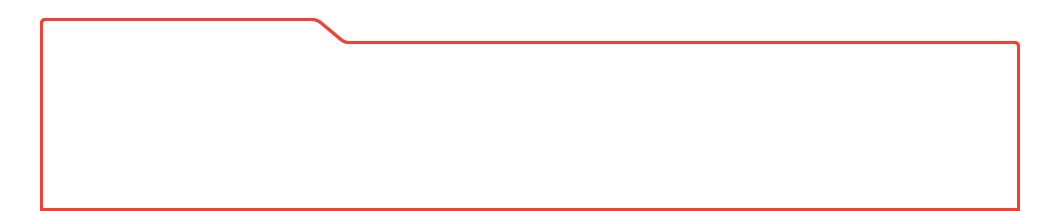
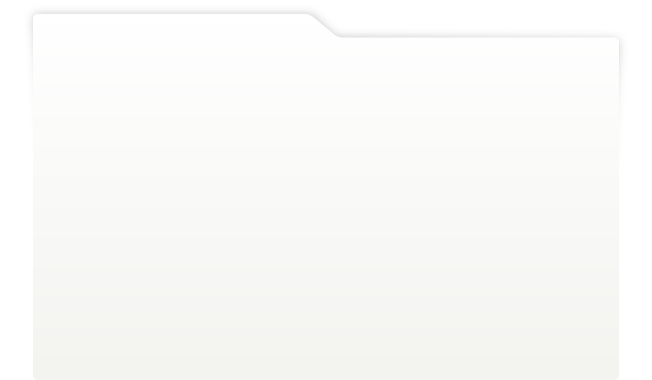
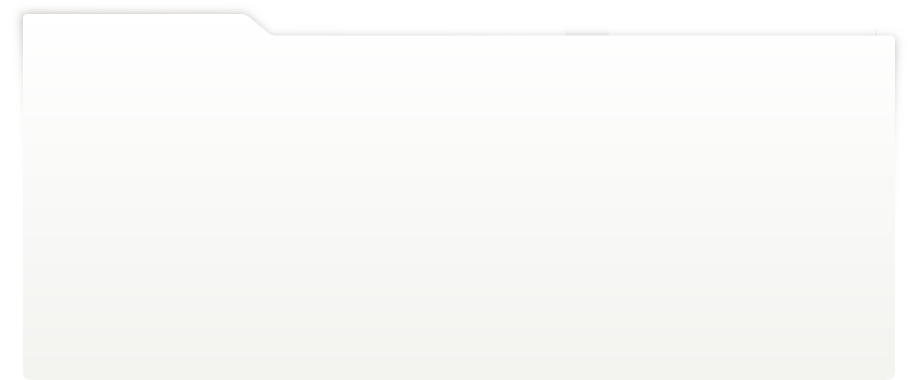
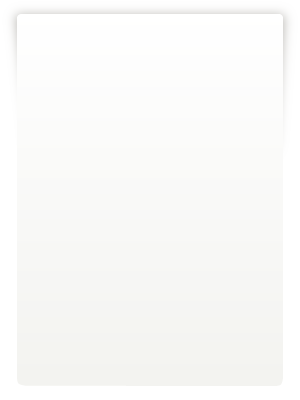
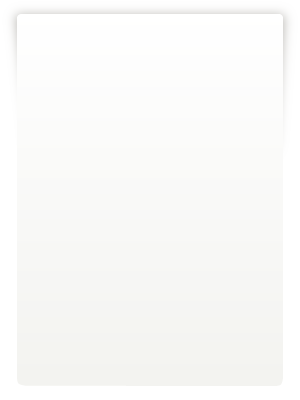
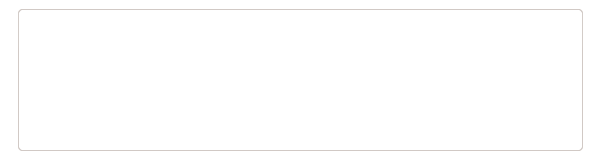
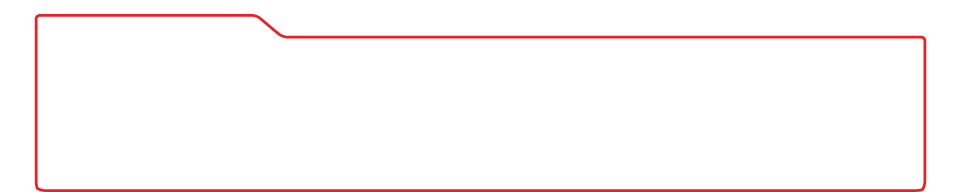
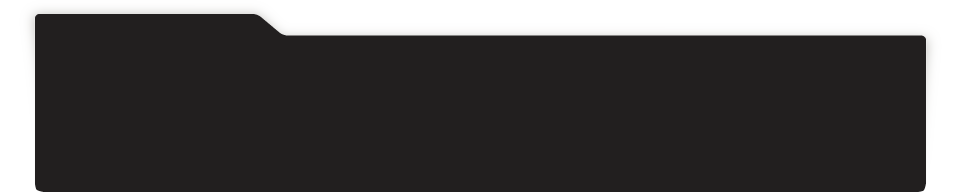
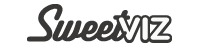
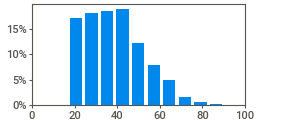
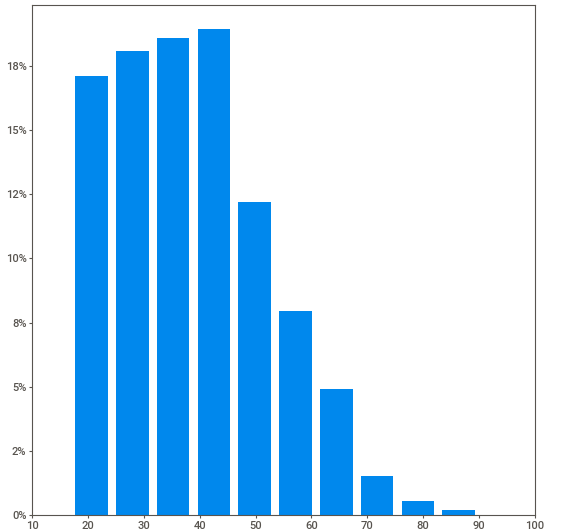
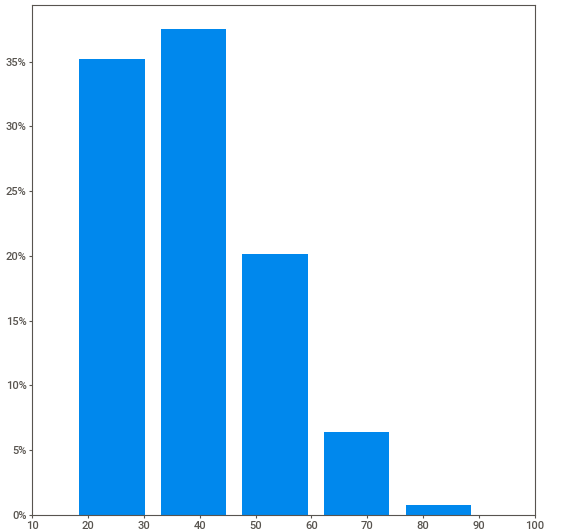
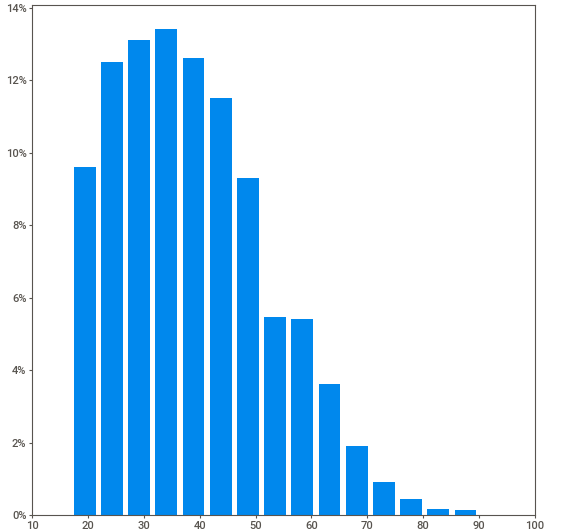
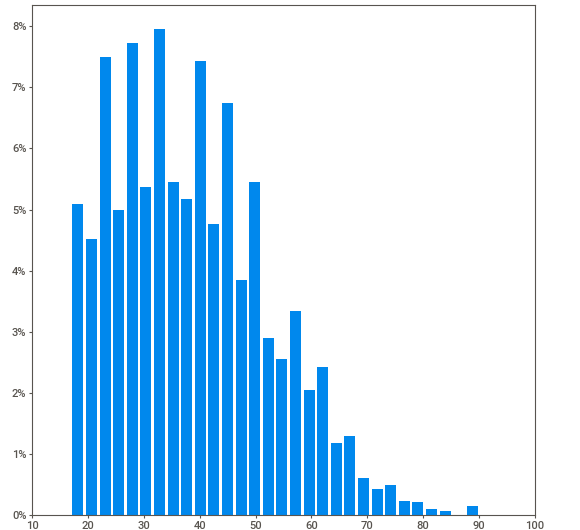
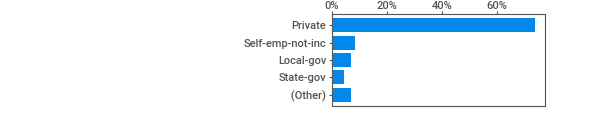
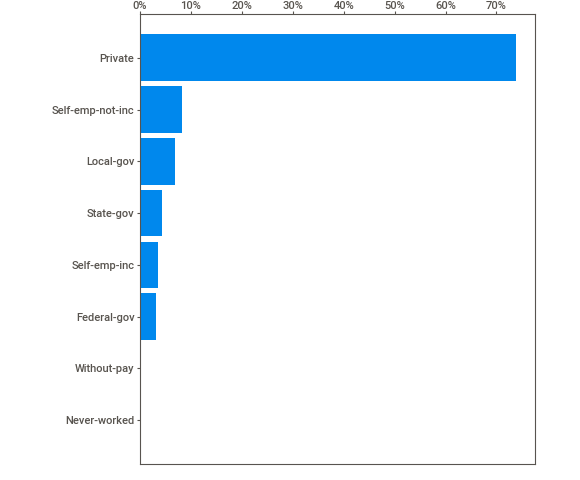
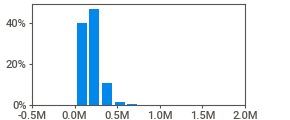
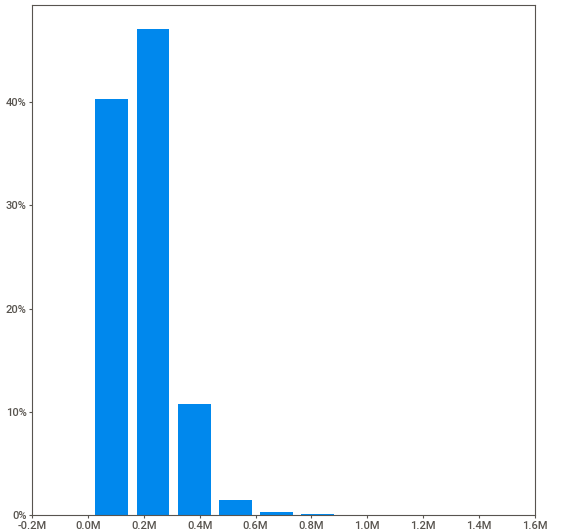
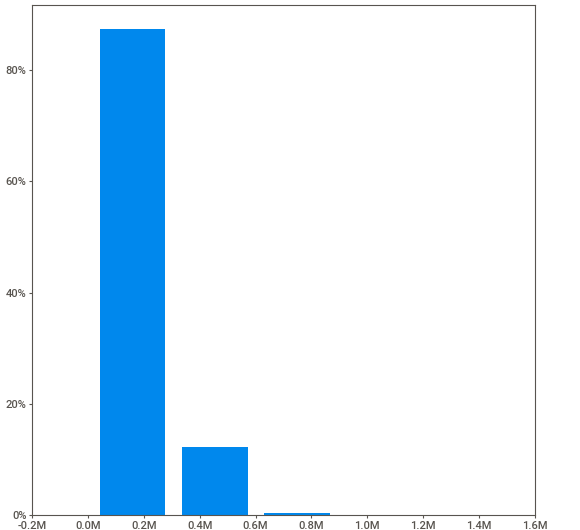
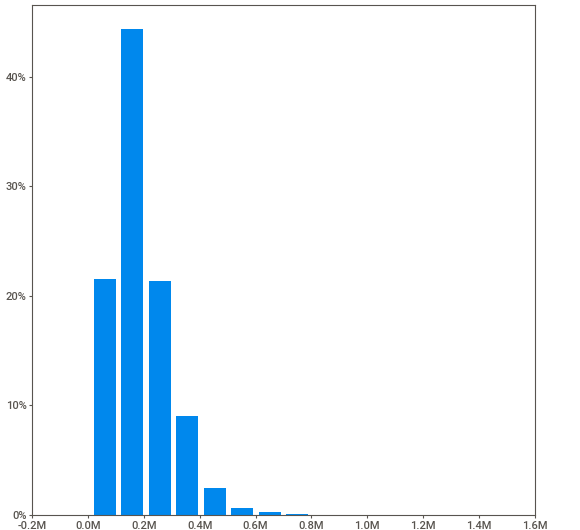
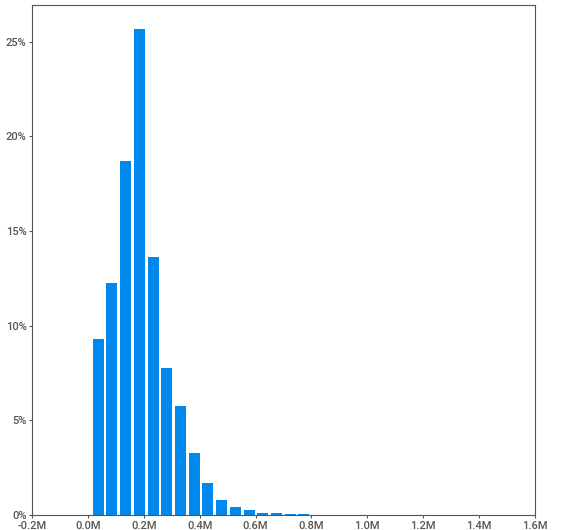
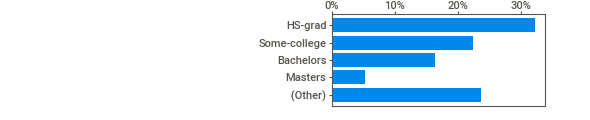
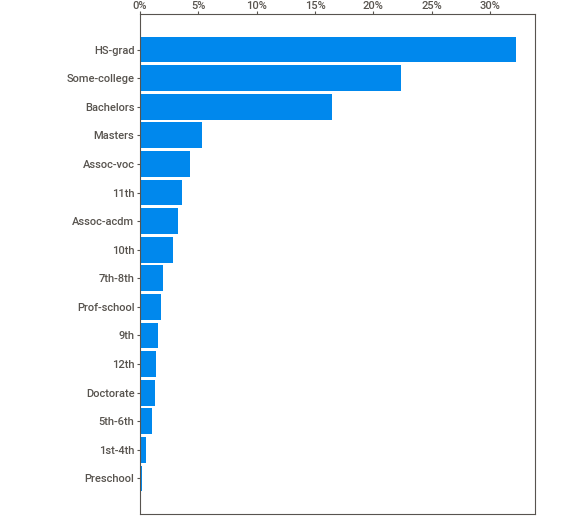
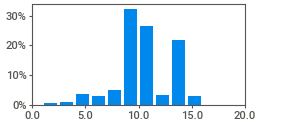
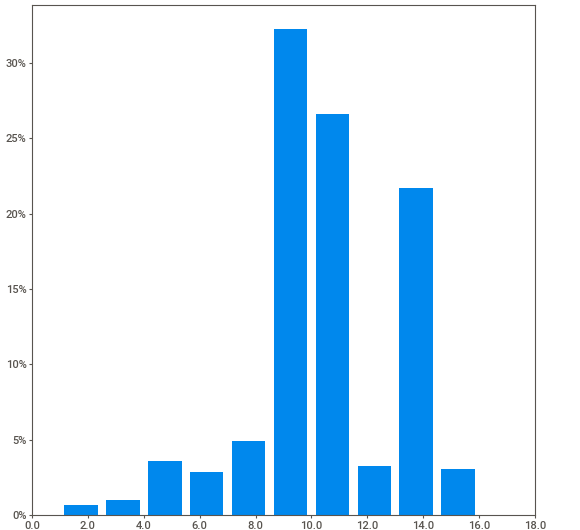
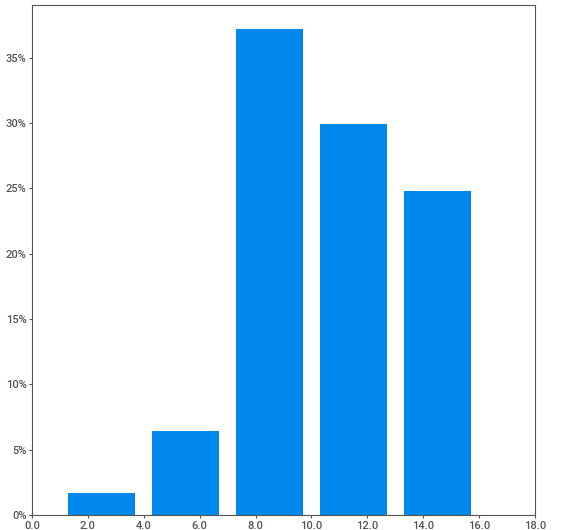
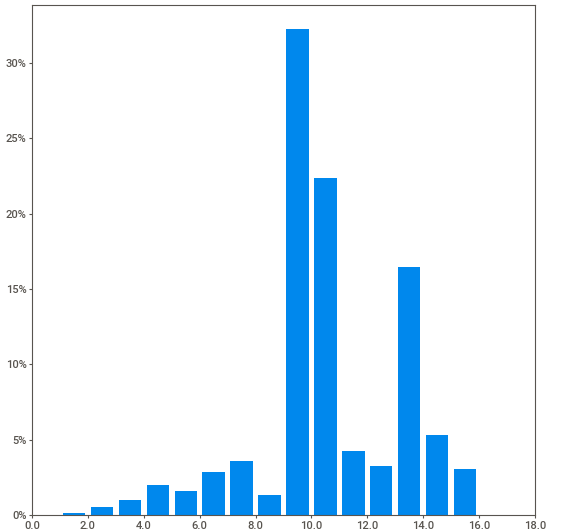
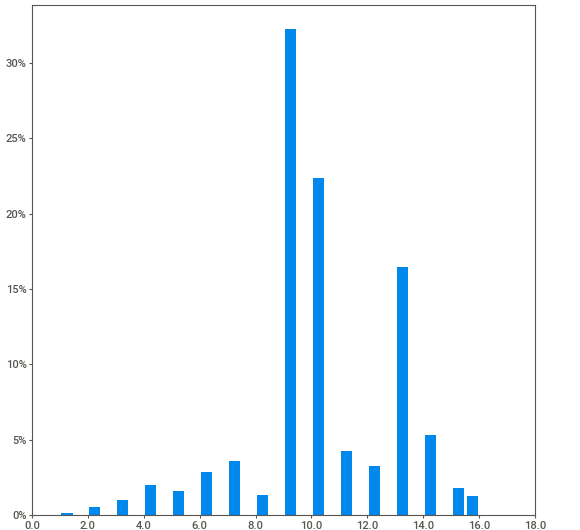
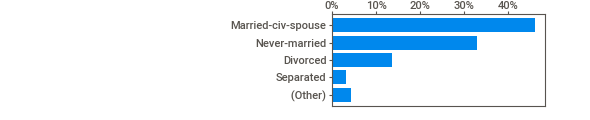
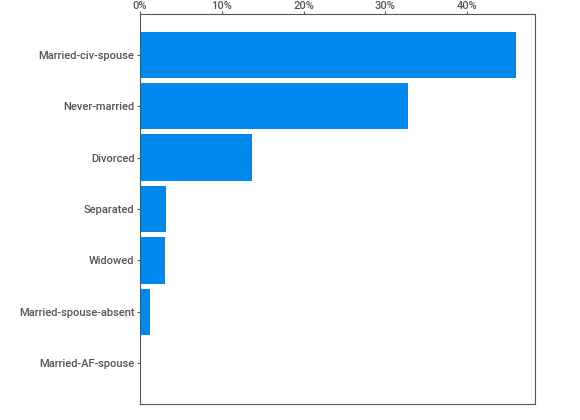
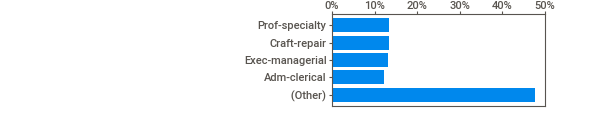
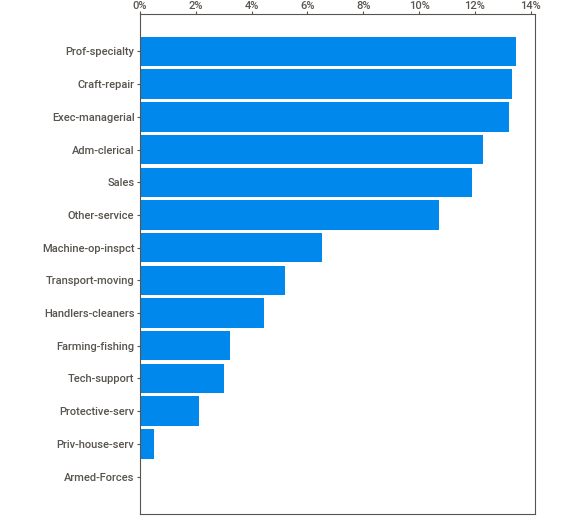
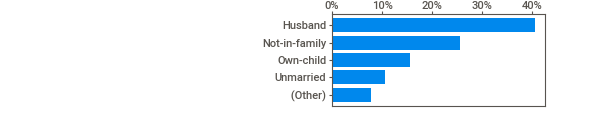
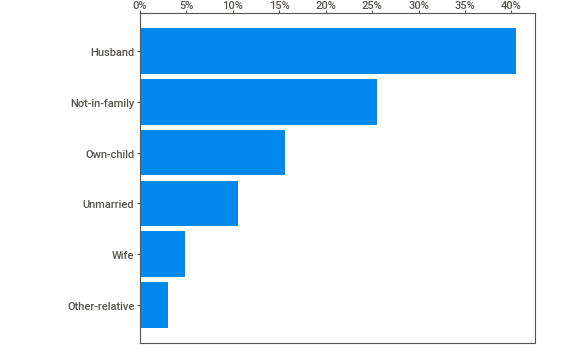
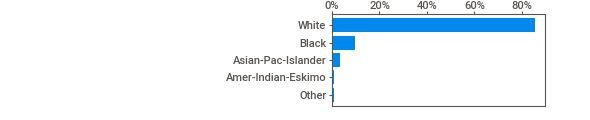
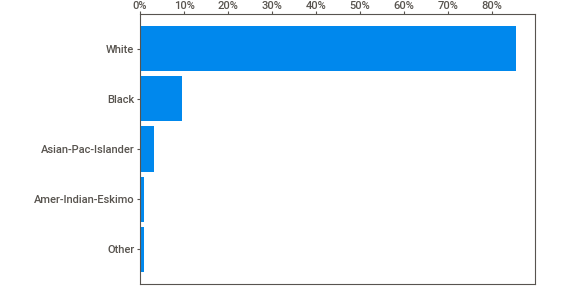
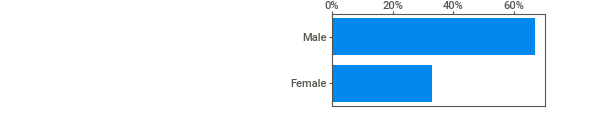
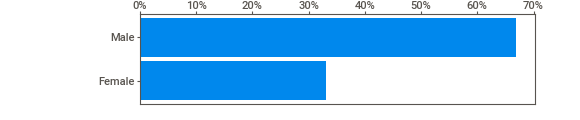
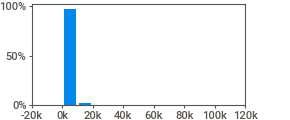
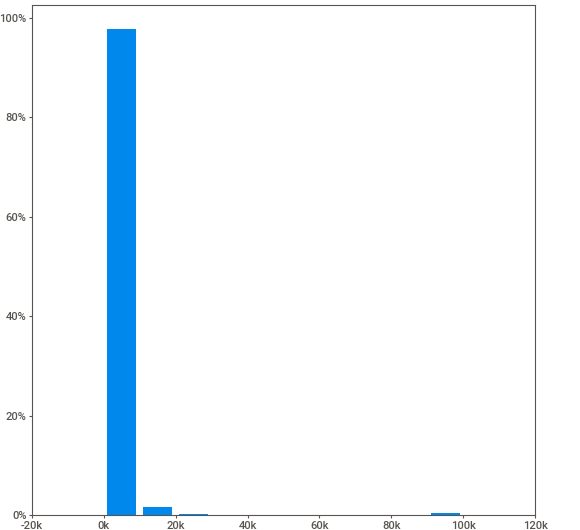
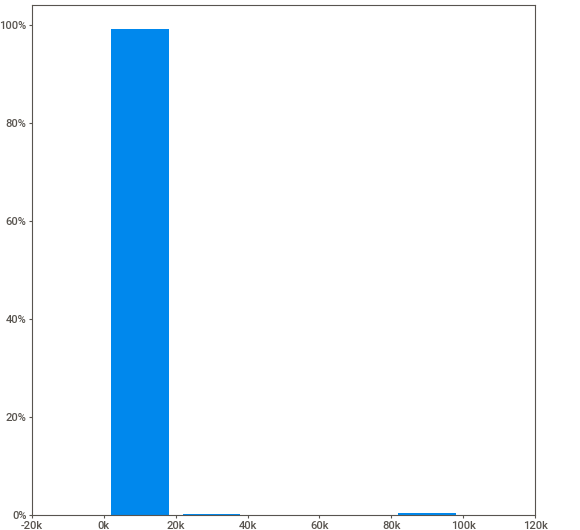
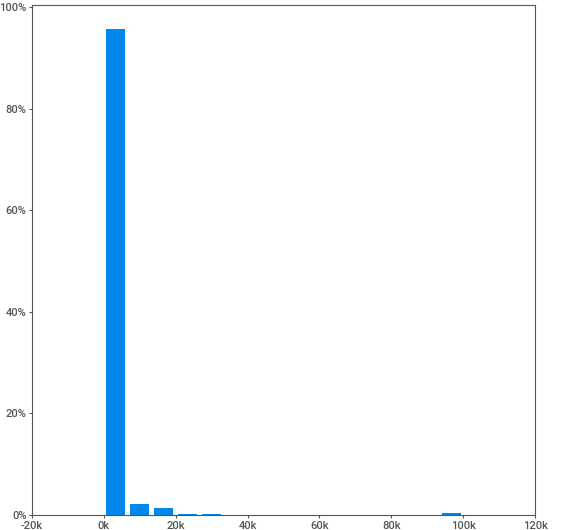
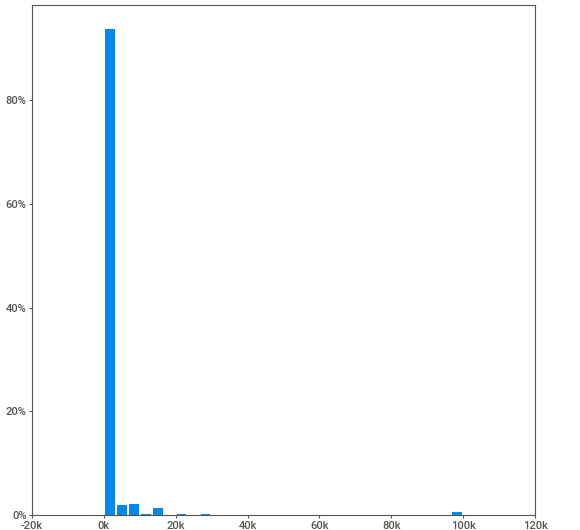
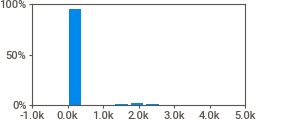
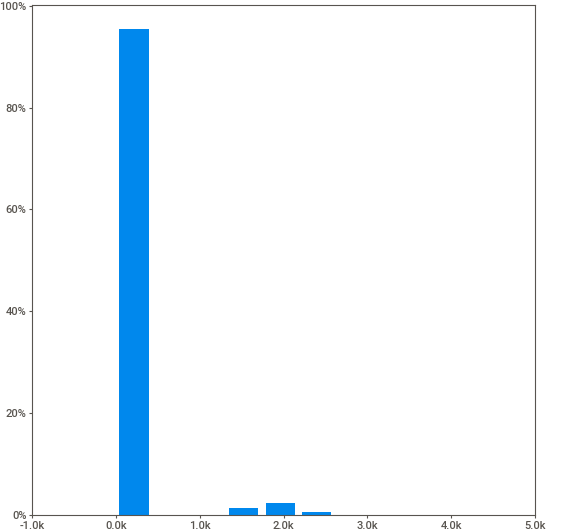
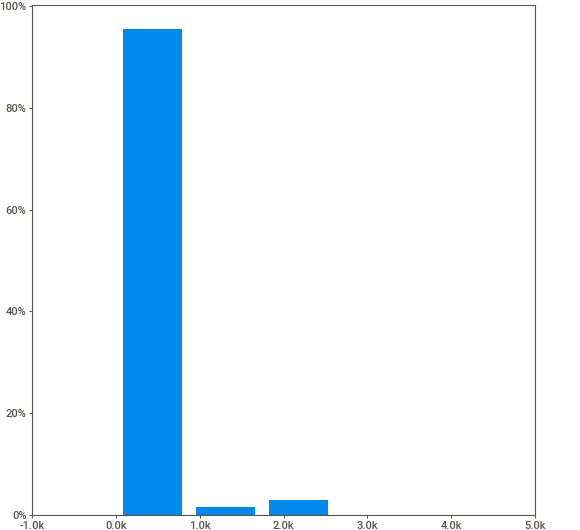
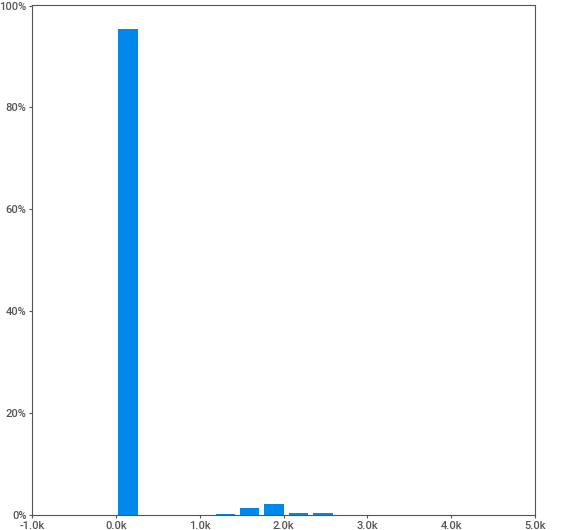
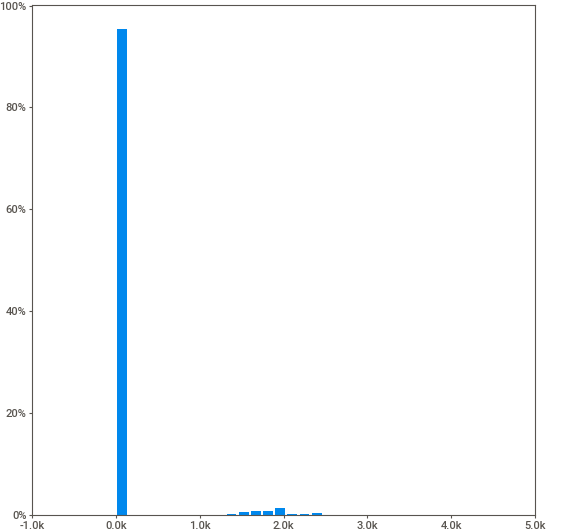
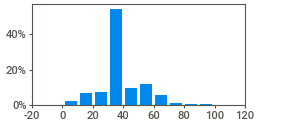
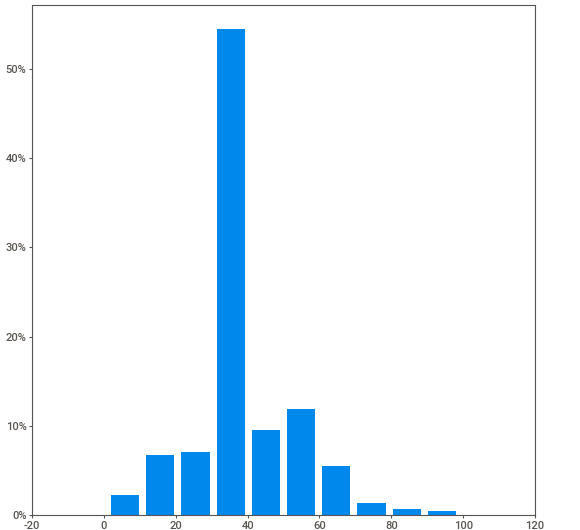
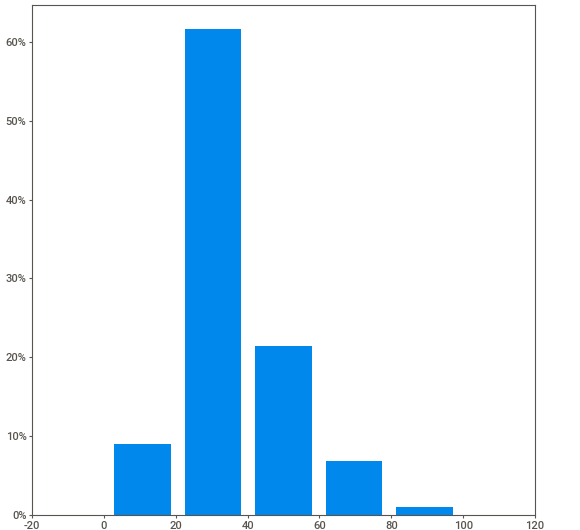
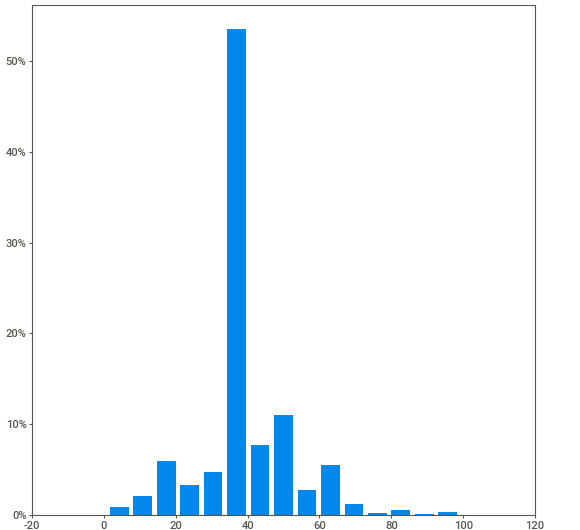
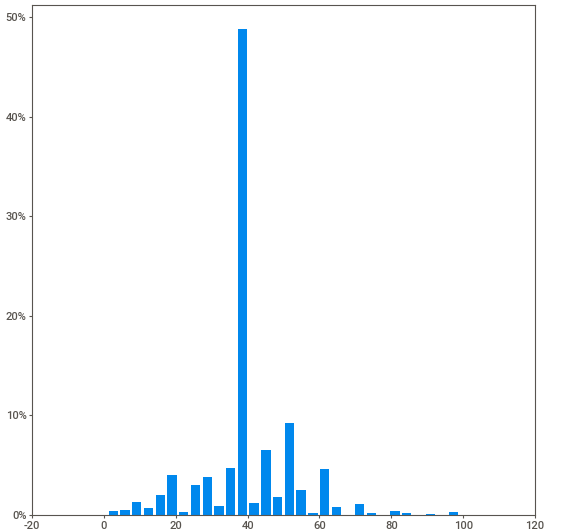
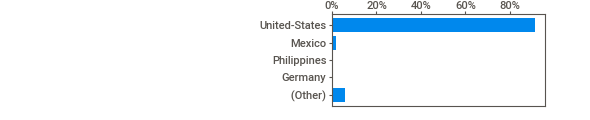
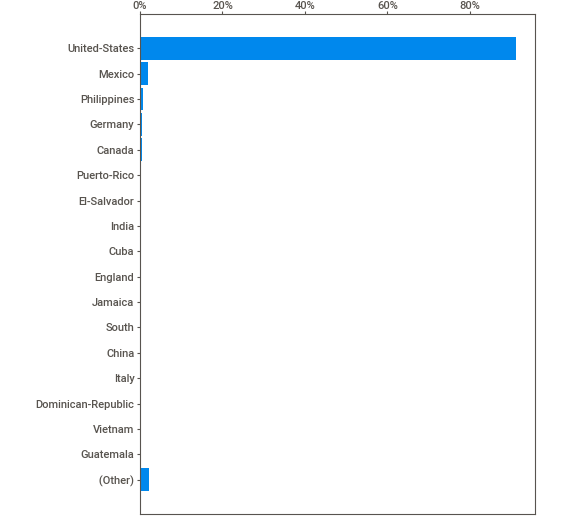
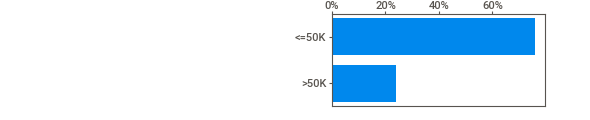
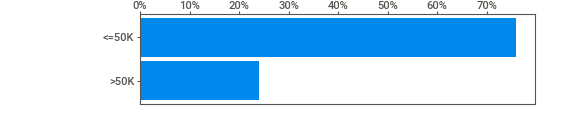
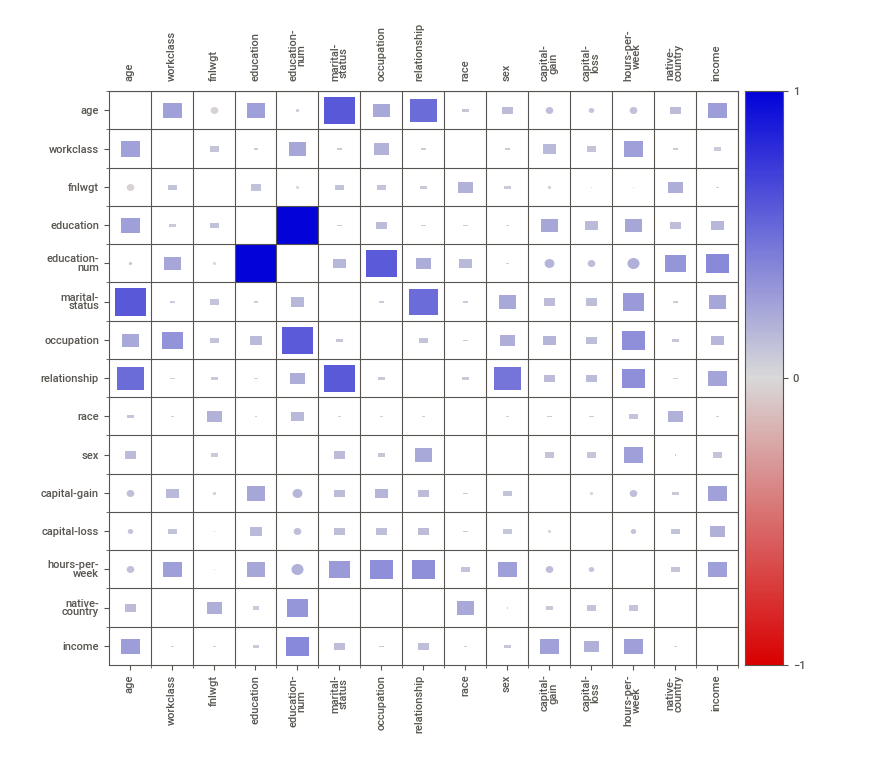
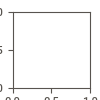

In [4]:
# we generate inline report
my_report.show_notebook()

In [ ]:
my_report_intra = sv.compare_intra(df, df["sex"] == "Male", ["Male", "Female"])
my_report_intra.show_notebook()

## YDATA  PROFILING
https://github.com/ydataai/ydata-profiling

In [6]:
from ydata_profiling import ProfileReport

In [7]:
profile = ProfileReport(df, title="Profiling Report")

In [8]:
#n a Jupyter Notebook, run:
# profile.to_widgets()

In [9]:
#The HTML report can be directly embedded in a cell in a similar fashion:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
#To generate a HTML report file, save the ProfileReport to an object and use the to_file() function:
profile.to_file("ydata_profiling.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# AUTOML

## MLJAR

In [ ]:
from supervised.automl import AutoML
automl = AutoML(mode="Perform")
# automl = AutoML(mode="Explain")
automl.fit(X_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_1
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 5 models
y_true takes value in {'<=50K', '>50K'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.
1_Default_LightGBM logloss 0.278884 trained in 46.91 seconds (1-sample predict time 0.0532 seconds)
y_true takes value in {'<=50K', '>50K'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.
2_Default_Xgboost loglo

In [ ]:
y_predicted = automl.predict(X_test)
y_predicted

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

In [ ]:
pd.read_csv('/content/AutoML_1/leaderboard.csv')

In [ ]:
import imageio

def show_image(file):
  im=imageio.imread(file)
  plt.figure(figsize=(8,8))
  plt.imshow(im)
  plt.show()


show_image('/content/AutoML_1/features_heatmap.png')
show_image('/content/AutoML_1/ldb_performance_boxplot.png')
show_image('/content/AutoML_1/correlation_heatmap.png')
show_image('/content/AutoML_1/Ensemble/confusion_matrix.png')
show_image('/content/AutoML_1/Ensemble/precision_recall_curve.png')
show_image('/content/AutoML_1/Ensemble/roc_curve.png')
show_image('/content/AutoML_1/3_Default_Xgboost/permutation_importance.png')
show_image('/content/AutoML_1/3_Default_Xgboost/shap_importance.png')
show_image('/content/AutoML_1/3_Default_Xgboost/learner_fold_0_shap_dependence.png')


# PYCARET

In [ ]:
# !pip install scikit-learn==0.23.2
# !pip install --pre pycaret
!pip install --use-deprecated=legacy-resolver pycaret[full]

In [ ]:
from pycaret.classification import *
s = setup(df, target = 'income')

In [ ]:
best = compare_models()

In [ ]:
print(best)
plot_model(best)

In [ ]:
evaluate_model(best)

## LAZYPREDICT
https://lazypredict.readthedocs.io/en/latest/

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models

# ATOM

In [ ]:
# # Call atom using only 5% of the complete dataset (for explanatory purposes)
# # Import packages
# !pip install atom-ml
# from atom import ATOMClassifier
# atom = ATOMClassifier(df, "income", n_rows=0.05, n_jobs=8, verbose=2)